#**Exploratory Data Analysis (EDA)**
EDA is essential to understand the characteristics of the dataset, identify patterns, correlations, and potential issues, and decide on the next steps for data preprocessing and modeling.

#**Import Libraries for EDA**

Firstly, ensure all necessary libraries are imported for performing EDA.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder


#**Load the Dataset**
Reload the dataset from the CSV file.

In [ ]:
df = pd.read_csv('/content/customer_churn_dataset.csv')


#**View the Dataset Structure**
We start viewing the basic structure and content of the dataset.

Like, `df.head()` provides a quick look at the first five rows. `df.info()` gives an overview, including data types and non-null counts. `df.isnull().sum()` checks for any missing values.

In [ ]:
df.head()

df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5000 non-null   object 
 1   Age               5000 non-null   int64  
 2   Gender            5000 non-null   object 
 3   ContractType      5000 non-null   object 
 4   MonthlyCharges    5000 non-null   float64
 5   TotalCharges      5000 non-null   float64
 6   TechSupport       5000 non-null   object 
 7   InternetService   5000 non-null   object 
 8   Tenure            5000 non-null   int64  
 9   PaperlessBilling  5000 non-null   object 
 10  PaymentMethod     5000 non-null   object 
 11  Churn             5000 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 468.9+ KB


,0
CustomerID,0
Age,0
Gender,0
ContractType,0
MonthlyCharges,0
TotalCharges,0
TechSupport,0
InternetService,0
Tenure,0
PaperlessBilling,0


#**Calculate Summary Statistics for Numerical Columns**

Now, we calculate summary statistics to understand the distribution of numerical features.

In [ ]:
numerical_summary = df.describe()
numerical_summary

,Age,MonthlyCharges,TotalCharges,Tenure
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.939000,70.676140,2563.452426,36.210000
std,15.295701,28.780096,1933.774036,21.244212
min,18.000000,20.000000,0.000000,0.000000
25%,30.000000,46.380000,989.310000,18.000000
50%,44.000000,71.280000,2118.945000,36.000000
75%,57.000000,95.335000,3803.997500,55.000000
max,70.000000,119.990000,8562.960000,72.000000


#**Analyze Categorical Data Distributions**
We analyze the distributions of categorical variables to understand their characteristics.

This loop displays the count of unique values for each categorical feature.

In [ ]:
categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for Gender:
Gender
Female    2515
Male      2485
Name: count, dtype: int64


Value counts for ContractType:
ContractType
Month-to-month    2963
Two year          1033
One year          1004
Name: count, dtype: int64


Value counts for TechSupport:
TechSupport
No     3506
Yes    1494
Name: count, dtype: int64


Value counts for InternetService:
InternetService
DSL            2046
Fiber optic    1980
No              974
Name: count, dtype: int64


Value counts for PaperlessBilling:
PaperlessBilling
Yes    3540
No     1460
Name: count, dtype: int64


Value counts for PaymentMethod:
PaymentMethod
Bank transfer       1311
Electronic check    1275
Mailed check        1238
Credit card         1176
Name: count, dtype: int64


Value counts for Churn:
Churn
No     3974
Yes    1026
Name: count, dtype: int64




#**Visualize Relationships Between Features and Target Variable (Churn)**

Visualize the relationships between features and the target variable to identify patterns.

**Bar Plots for Categorical Features vs. Churn**
- Bar plots will show how each categorical feature relates to churn.

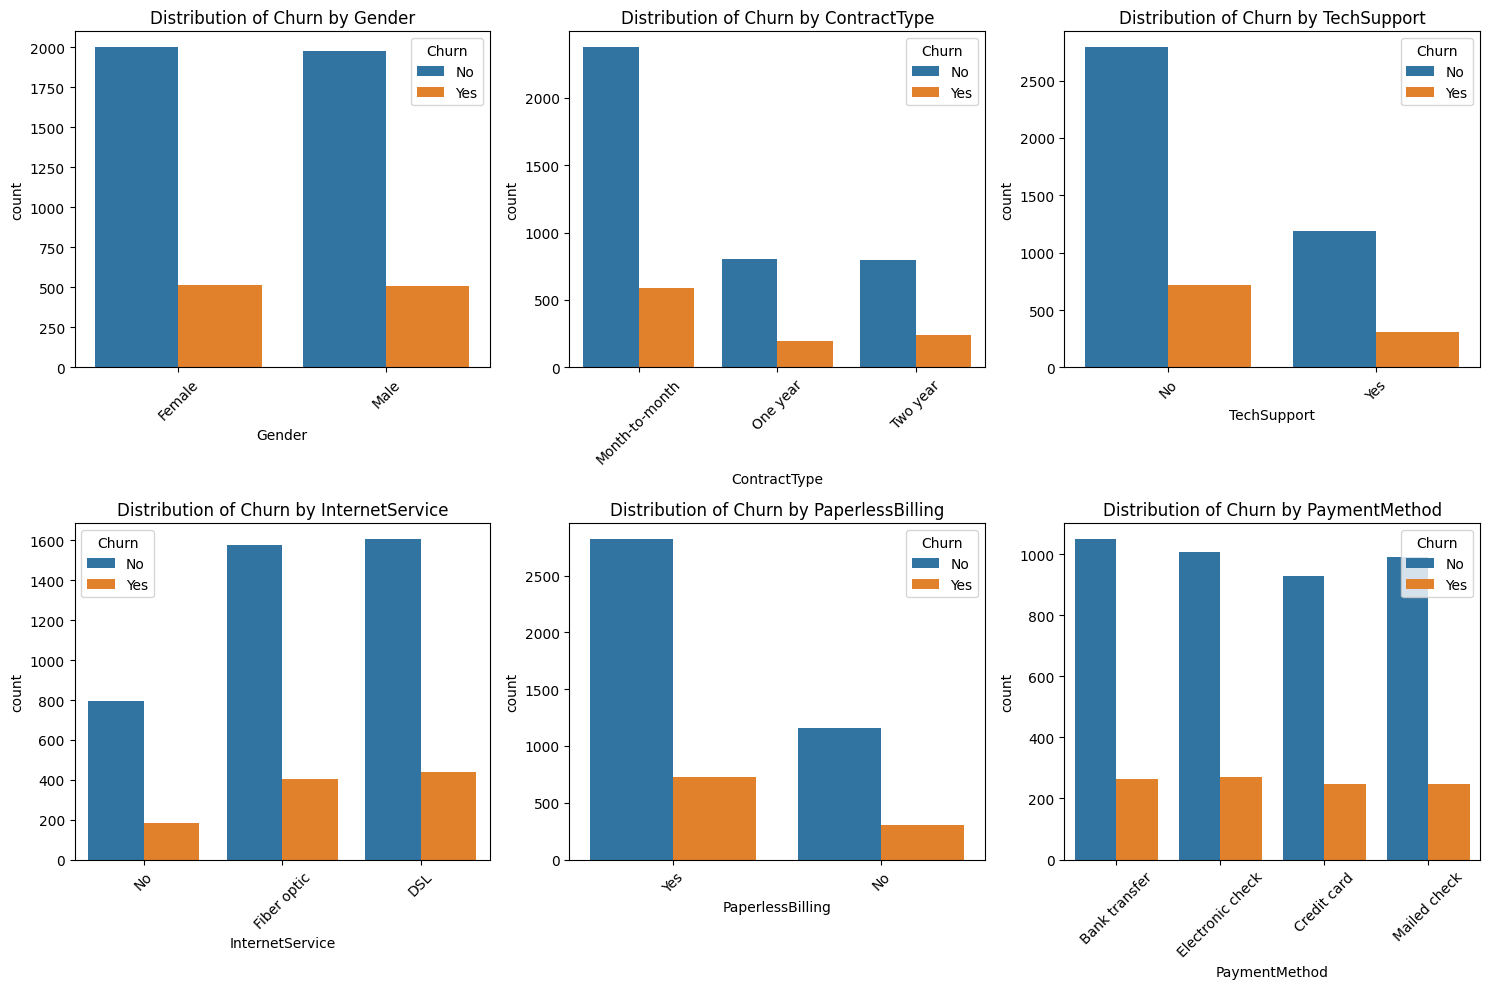

In [ ]:
plt.figure(figsize=(15, 10))


for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f"Distribution of Churn by {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Histograms for Numerical Features**

- Help in observing the distributions of numerical features and their relationship with churn.

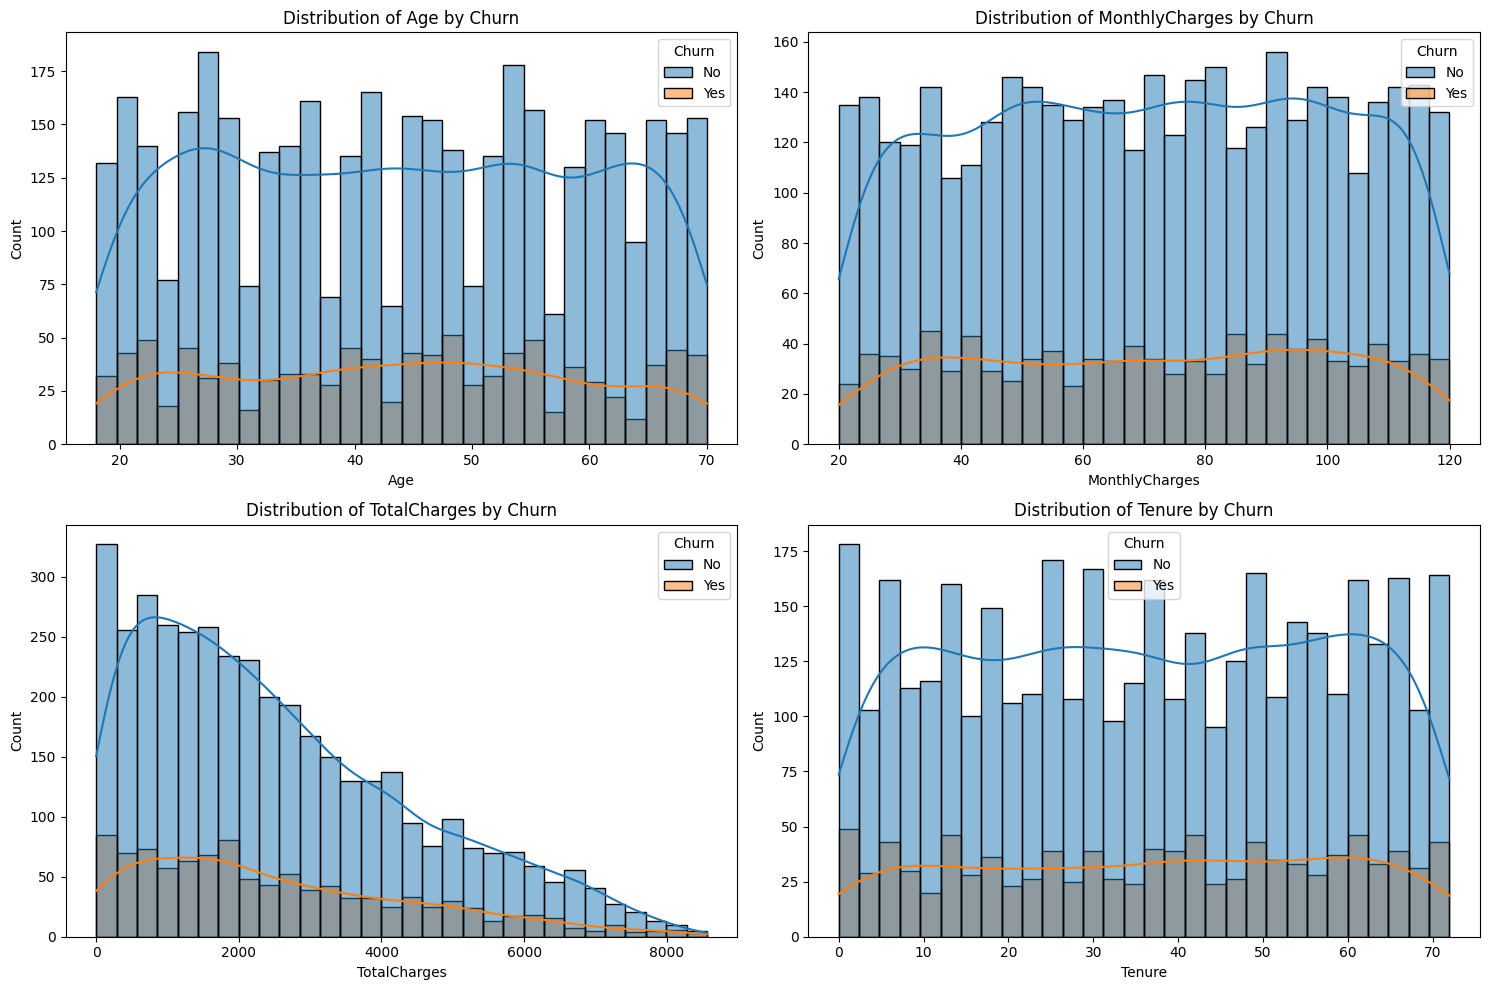

In [ ]:
numerical_columns = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True, hue='Churn', bins=30)
    plt.title(f"Distribution of {column} by Churn")

plt.tight_layout()
plt.show()


**Create Churn Distribution Pie Chart**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



data = pd.read_csv('/content/customer_churn_dataset.csv')
type_ = ["No", "Yes"]

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)


fig.update_layout(
    title_text="Churn Distributions",
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()


**Identify Potential Correlations and Patterns**

- Analyze the correlations between numerical features to detect any strong relationships.
- The correlation matrix shows the strength of linear relationships between numerical features.

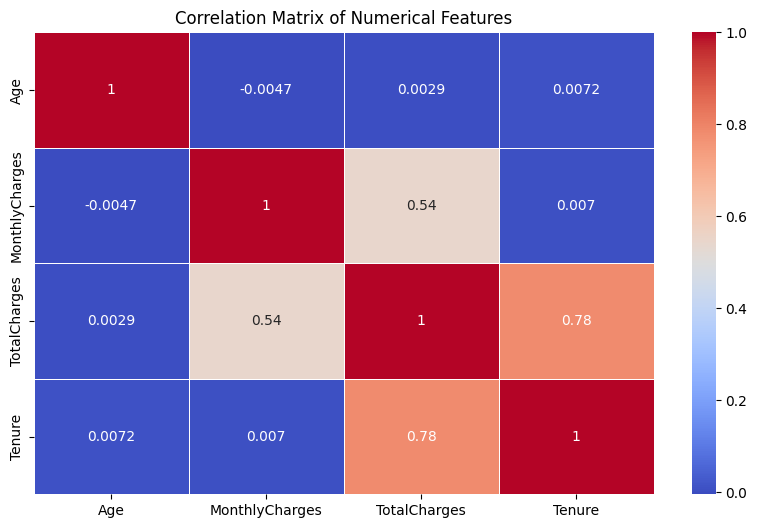

In [ ]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**Visualize Churn by Payment Method**

In [9]:

labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method Distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


**Churn Distribution by Internet Service and Gender**

In [8]:

male_internet_churn = data[data["Gender"] == "Male"].groupby(["InternetService", "Churn"]).size()
female_internet_churn = data[data["Gender"] == "Female"].groupby(["InternetService", "Churn"]).size()

print("Churn distribution by Internet Service for Males:\n", male_internet_churn)
print("Churn distribution by Internet Service for Females:\n", female_internet_churn)


fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [female_internet_churn.get(('DSL', 'No'), 0), male_internet_churn.get(('DSL', 'No'), 0),
       female_internet_churn.get(('DSL', 'Yes'), 0), male_internet_churn.get(('DSL', 'Yes'), 0)],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [female_internet_churn.get(('Fiber optic', 'No'), 0), male_internet_churn.get(('Fiber optic', 'No'), 0),
       female_internet_churn.get(('Fiber optic', 'Yes'), 0), male_internet_churn.get(('Fiber optic', 'Yes'), 0)],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [female_internet_churn.get(('No', 'No'), 0), male_internet_churn.get(('No', 'No'), 0),
       female_internet_churn.get(('No', 'Yes'), 0), male_internet_churn.get(('No', 'Yes'), 0)],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
fig.show()


Churn distribution by Internet Service for Males:
 InternetService  Churn
DSL              No       825
                 Yes      218
Fiber optic      No       768
                 Yes      200
No               No       381
                 Yes       93
dtype: int64
Churn distribution by Internet Service for Females:
 InternetService  Churn
DSL              No       780
                 Yes      223
Fiber optic      No       808
                 Yes      204
No               No       412
                 Yes       88
dtype: int64


**Churn Distribution by Other Features**

In [20]:

color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Gender", barmode="group",
                   title="<b>Churn Distribution w.r.t. Gender</b>",
                   color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="ContractType", barmode="group", title="<b>Churn Distribution w.r.t. Contract Type</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="InternetService", title="<b>Churn Distribution w.r.t. Internet Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



**Churn Distribution by Other Factors**

In [21]:
fig = px.histogram(data, x="Churn", color="TechSupport", barmode="group", title="<b>Churn Distribution w.r.t. Tech Support</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


#churn distribution w.r.t. Paperless Billing
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling", title="<b>Churn Distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

#  churn distribution w.r.t. Tech Support
fig = px.histogram(data, x="Churn", color="TechSupport", barmode="group", title="<b>Churn Distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

#  churn distribution w.r.t. Phone Service
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="InternetService", title="<b>Churn Distribution w.r.t. Internet Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**KDE Plots for Monthly and Total Charges**

<ipython-input-14-a3b98d0070a5>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-14-a3b98d0070a5>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




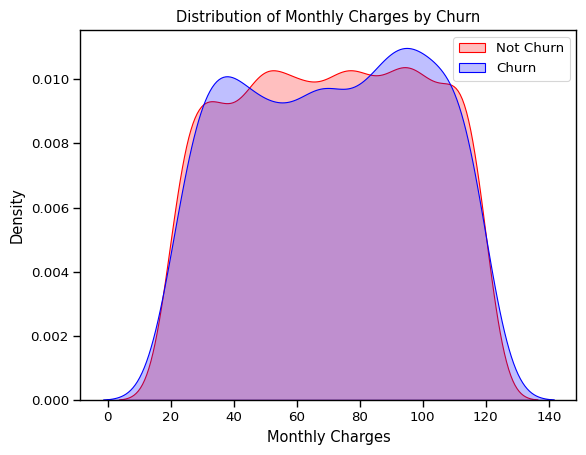

<ipython-input-14-a3b98d0070a5>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-14-a3b98d0070a5>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




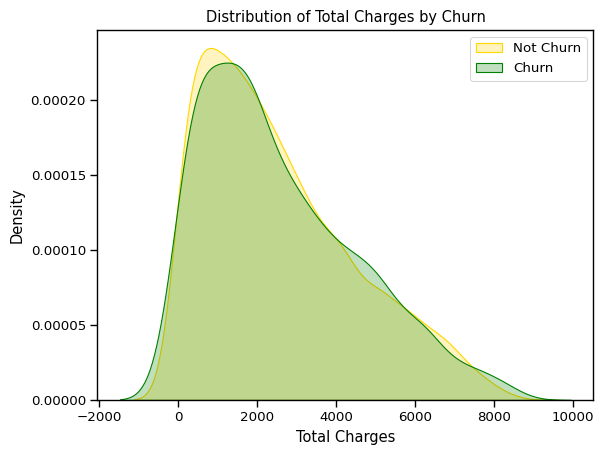

In [14]:
sns.set_context("paper", font_scale=1.1)

ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], color="Red", shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes')], ax=ax, color="Blue", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')
plt.show()

ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No')], color="Gold", shade=True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes')], ax=ax, color="Green", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()


**Box Plot for Tenure vs Churn**

In [22]:

fig = px.box(data, x='Churn', y='Tenure')

fig.update_yaxes(title_text='Tenure (Months)')
fig.update_xaxes(title_text='Churn')

fig.update_layout(autosize=True, width=750, height=600,
                  title_font=dict(size=25, family='Courier'),
                  title='<b>Tenure vs Churn</b>')

fig.show()


**Correlation Analysis**

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary columns and one-hot encode other categorical columns
le = LabelEncoder()
le_count = 0

# Encode binary categorical columns
for col in data.columns:
    if data[col].dtype == 'object' and len(data[col].unique()) == 2:
        data[col] = le.fit_transform(data[col])
        le_count += 1

print(f'{le_count} columns were label encoded.')

# One-hot encode columns with more than two unique values
data = pd.get_dummies(data, columns=['ContractType', 'InternetService'], drop_first=True)


0 columns were label encoded.


Positive Correlations:
ContractType_Two year    0.030615
MonthlyCharges           0.006852
Tenure                   0.006750
TotalCharges             0.006117
TechSupport              0.002630
Gender                   0.001068
dtype: float64

Negative Correlations:
InternetService_Fiber optic   -0.002325
PaperlessBilling              -0.003712
Age                           -0.006522
ContractType_One year         -0.008679
InternetService_No            -0.023589
dtype: float64


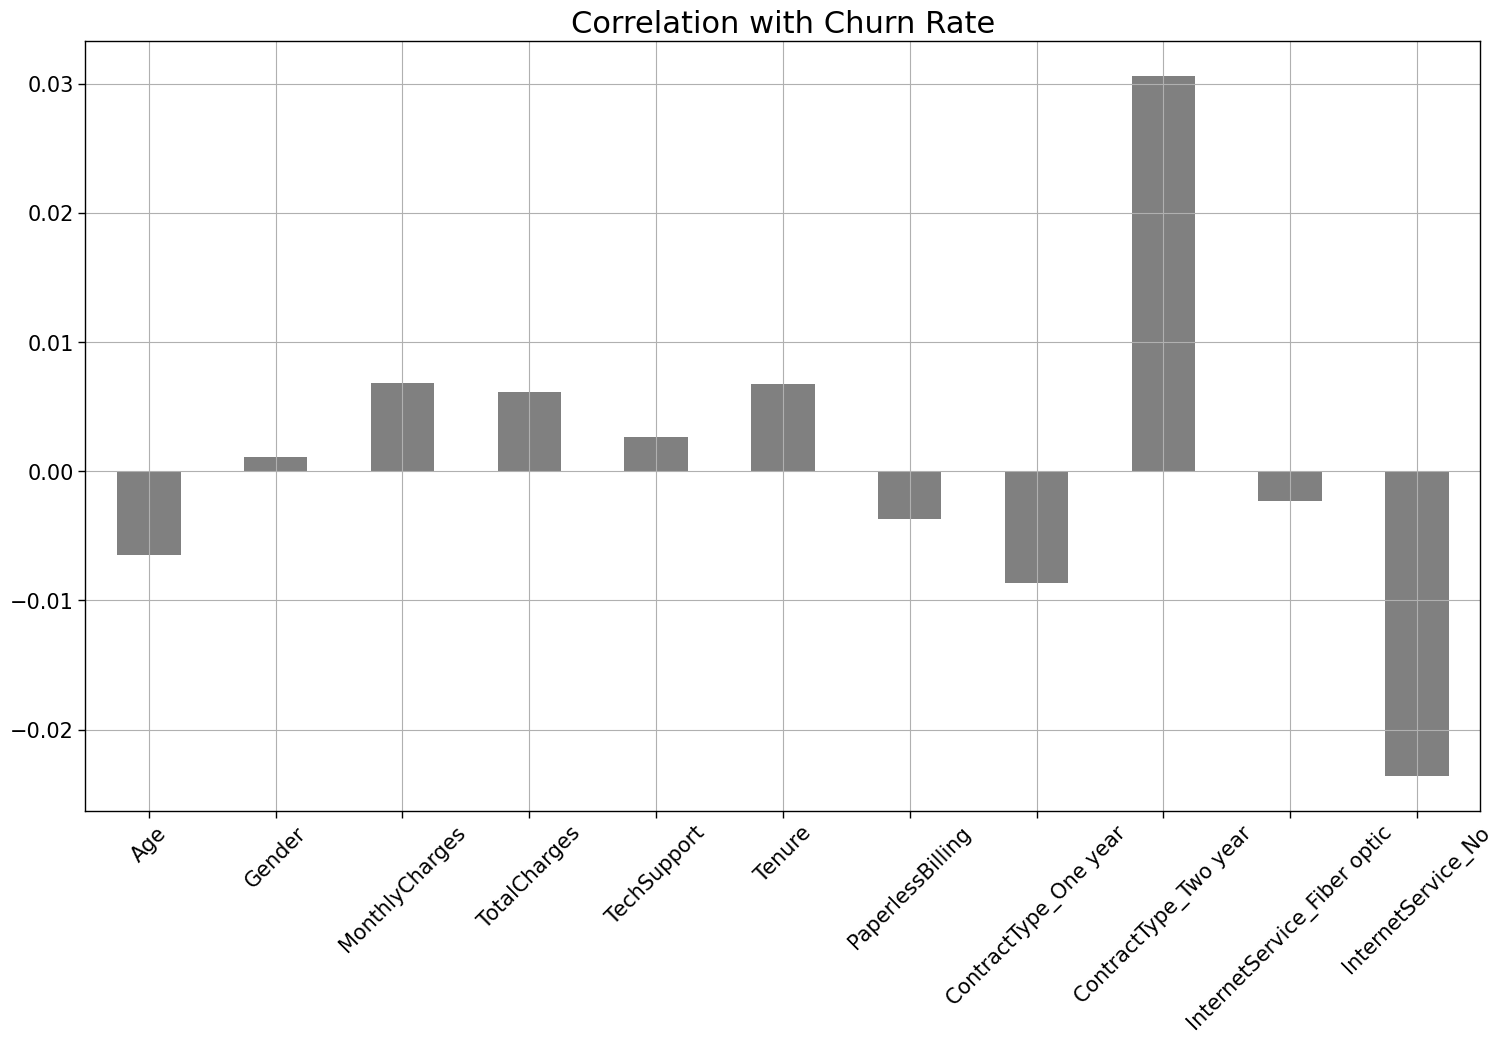

In [25]:

numeric_columns = ['Age', 'Gender', 'MonthlyCharges', 'TotalCharges', 'TechSupport', 'Tenure',
                   'PaperlessBilling', 'ContractType_One year', 'ContractType_Two year',
                   'InternetService_Fiber optic', 'InternetService_No']

data2 = data[numeric_columns]

# Calculate correlations with Churn
correlations = data2.corrwith(data['Churn'].astype(float))
correlations = correlations[correlations != 1]
positive_correlations = correlations[correlations > 0].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending=False)

print("Positive Correlations:")
print(positive_correlations)

print("\nNegative Correlations:")
print(negative_correlations)

# Plot correlation bars
correlations.plot.bar(figsize=(18, 10), fontsize=15, color='grey', rot=45, grid=True)
plt.title('Correlation with Churn Rate', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
plt.show()


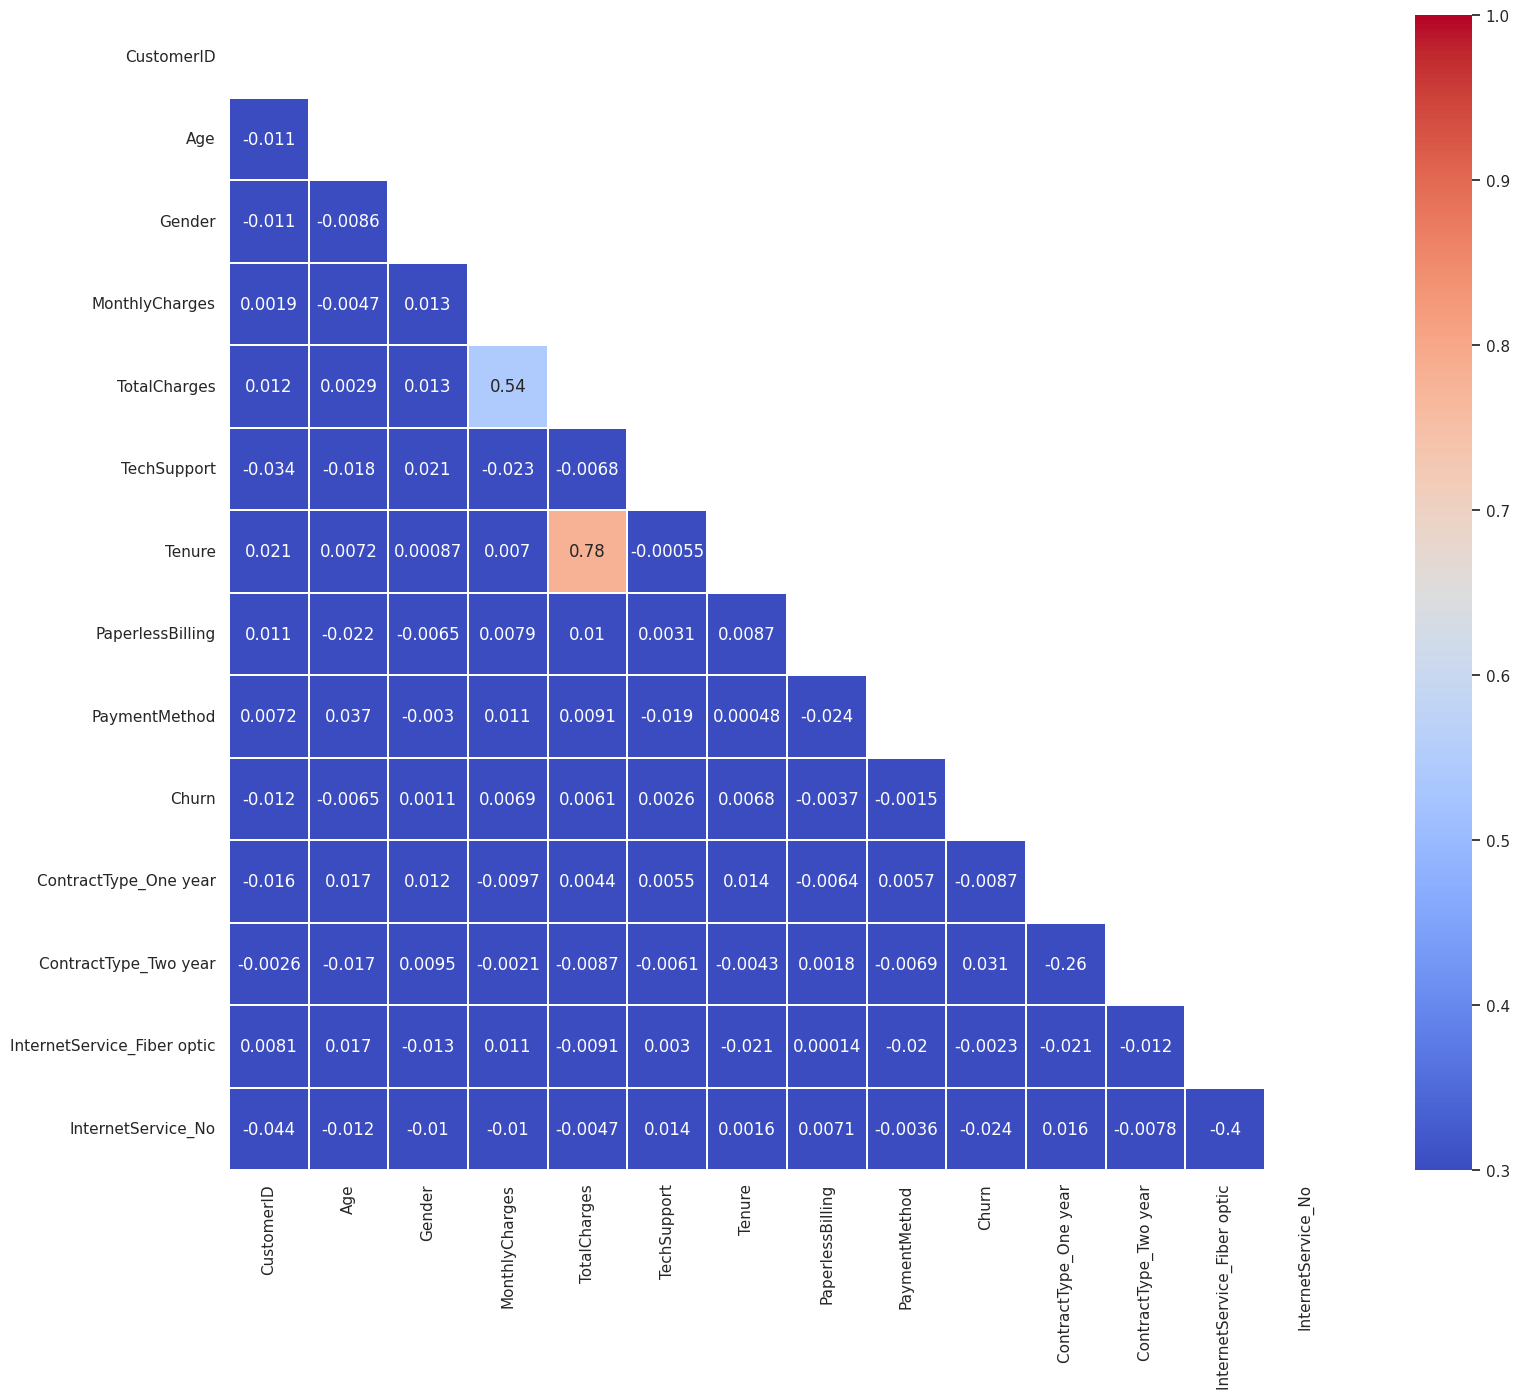

In [26]:
# Correlation matrix using heatmap
sns.set(style="white")
plt.figure(figsize=(18, 15))
corr = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)
plt.show()
